In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np


In [2]:
# MNIST veri setini yükle
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 3s 0us/step


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [4]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 22s 23ms/step - loss: 0.1773 - accuracy: 0.9465
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 3/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0364 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0235 - accuracy: 0.9922


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 5ms/step - loss: 0.0329 - accuracy: 0.9904
Test accuracy: 0.9904000163078308


1/1 [==============================] - 0s 18ms/step


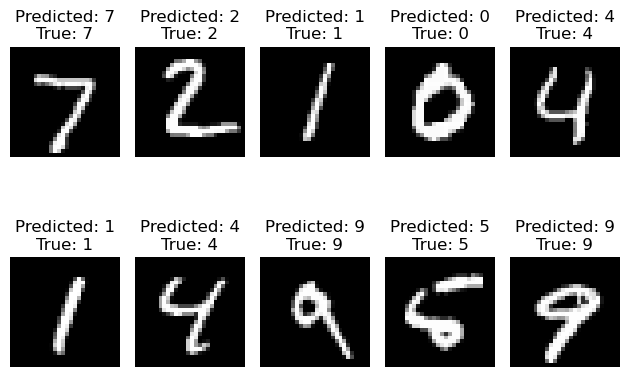

In [18]:
import matplotlib.pyplot as plt

for i in range(10):

    test_image = test_images[i]
    test_image = test_image.reshape((1, 28, 28, 1))

    prediction = model.predict(test_image)

    predicted_class = np.argmax(prediction)

    true_class = np.argmax(test_labels[i])

    # Görüntüyü ve tahmin edilen sınıfı göster
    plt.subplot(2, 5, i+1)
    plt.imshow(test_image.reshape((28, 28)), cmap='gray')
    plt.title("Predicted: " + str(predicted_class) + "\nTrue: " + str(true_class))
    plt.axis('off')

plt.tight_layout()
plt.show()
